In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

Перетащим функции из урока чтоб не придумывать ничего лешнего, и добавим свою

In [4]:
def calc_normal_feat(x):    
    return ((x - x.min()) / (x.max() - x.min()))

In [5]:
def calc_std_feat(x):
    return (x - x.mean()) / x.std()  

In [6]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)  

А вот функцию для построения модели возьму свою, из первого урока, где задаем уровень различия двух ошибок 

In [100]:
def my_model (X, y, lambda_=1e-8, alpha = 1e-4, delta = 1e-5,sh_info=False):
    # Сформировали массив с рандомными налаьными коээфцициентами, исходя из их колличества
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    err1 = None
    err2 = None
    i = 0
    delta_around = delta + delta/8

    while (err1 == None or err2 == None or err2-err1>delta):
        #просто счетчик для вывода   
        i += 1
    
        y_pred = np.dot(W, X)
    
        if (err1 != None):
            err2 = err1

        err1 = calc_mse(y, y_pred)
    
        # Так было без регулерезации
        #W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1))
        
        #А вот так стало с регулеразцией, добили вклад ещё самих весов 
        W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1) + lambda_ * W)
        
        if sh_info:
            if i % 100 == 0:  
                print(i, W, err1)
            elif (err1 != None and err2 != None and err2-err1<delta_around):
                print(i, W, err1)

    return W    

In [90]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [91]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])
X = X.astype(np.float64)

# Проведем сначала нормализацию признаков, которые у нас не лежежат в промежутке 0-1
X_prep = X.copy()

# Нормализуем наши три признака
X_prep[1] = calc_normal_feat(X_prep[1])
X_prep[2] = calc_normal_feat(X_prep[2])
X_prep[3] = calc_normal_feat(X_prep[3])
#X_prep

#А теперь проведем их стандартизацию
X_prep[1] = calc_std_feat(X_prep[1])
X_prep[2] = calc_std_feat(X_prep[2])
X_prep[3] = calc_std_feat(X_prep[3])
X_prep

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

Начинаем строить графики для разных лямбда, чтобы оценить масштаб её возможнфх изменений 

In [92]:
W1 = my_model(X_prep,y)
W1

array([57.39999968,  5.78796874,  1.84247925,  4.03158211])

In [93]:
W2 = my_model(X_prep,y,1e-4)
W2

array([57.39712802,  5.78577482,  1.84073819,  4.03534292])

In [94]:
W3 = my_model(X_prep,y,1)
W3

array([38.26656468,  3.66623353,  2.94010882,  3.25500099])

In [95]:
W4 = my_model(X_prep,y,100)
W4

array([1.12548955, 0.20774578, 0.20104823, 0.2018609 ])

Теперь стало понятнее как меняется и в каком диапазоне лямбда надо сторить графики

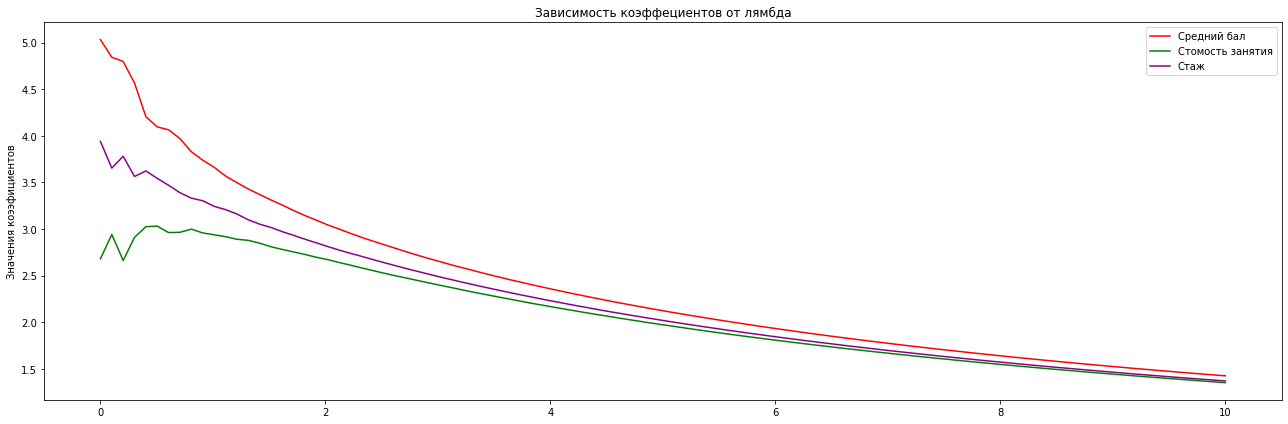

In [102]:
rng = np.linspace(1e-8,10,100)
tmp = []
for t in rng:
    tmp.append(my_model(X_prep,y,t))

W_value = np.array(tmp)

fig, ax = plt.subplots(figsize=(18, 6))

#Уберем наш коээфециент искускуственный...
#ax.plot(rng, W_value[:,0], label='Икуственный коэффциент')
ax.plot(rng, W_value[:,1], label='Средний бал', color='red')
ax.plot(rng, W_value[:,2], label='Стомость занятия', color='green')
ax.plot(rng, W_value[:,3], label='Стаж',color = 'darkmagenta')

ax.set_title('Зависимость коэффециентов от лямбда')
ax.legend(loc='upper right')
ax.set_ylabel('Значения коээфициентов')
fig.tight_layout()
plt.show()

Мне несколько не понятнет резузльтат итоговый, так как вроде они должны были все стримится к 0 с разной скорстью. Мы вроде как за счет этого и должны были понимать каково их влияиние, но вместо этого они стремятся к некому значению, причем так странно. Один снизу, второй серху. Вначале во всяком случае. дальше конечно заметно, что скорость падения чуть разная.

# 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Да, конечно. Более того как правило (на сколько я могу судить) в большинстве случаев это и нужно будет делать. Если это только не бинарные (или булевые показатели), или ещё какие-то перечисления. 

# 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

Вот это у нас L1 (Лассо регулиризация)


f(x, W) + (lambda_/2) * np.sum(np.abs(W))

Получается что нам нужно взять производную от от правой части как в уроке. А тут всё что меняется это то, что проивольная от модуля это W/|W| 

В итоге получаем вот такую функцию для расчета весов

W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1) + (lambda_ * W) /2*abs(w))

In [106]:
def my_model_l1 (X, y, lambda_=1e-8, alpha = 1e-4, delta = 1e-5,sh_info=False):
    # Сформировали массив с рандомными налаьными коээфцициентами, исходя из их колличества
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    err1 = None
    err2 = None
    i = 0
    delta_around = delta + delta/8

    while (err1 == None or err2 == None or err2-err1>delta):
        #просто счетчик для вывода   
        i += 1
    
        y_pred = np.dot(W, X)
    
        if (err1 != None):
            err2 = err1

        err1 = calc_mse(y, y_pred)
    
        # Так было без регулерезации
        #W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1))
        
        #А вот так стало с регулеразцией, добили вклад ещё самих весов 
        W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1) + (lambda_ * W)/(2*abs(W)))
        
        if sh_info:
            if i % 100 == 0:  
                print(i, W, err1)
            elif (err1 != None and err2 != None and err2-err1<delta_around):
                print(i, W, err1)

    return W    

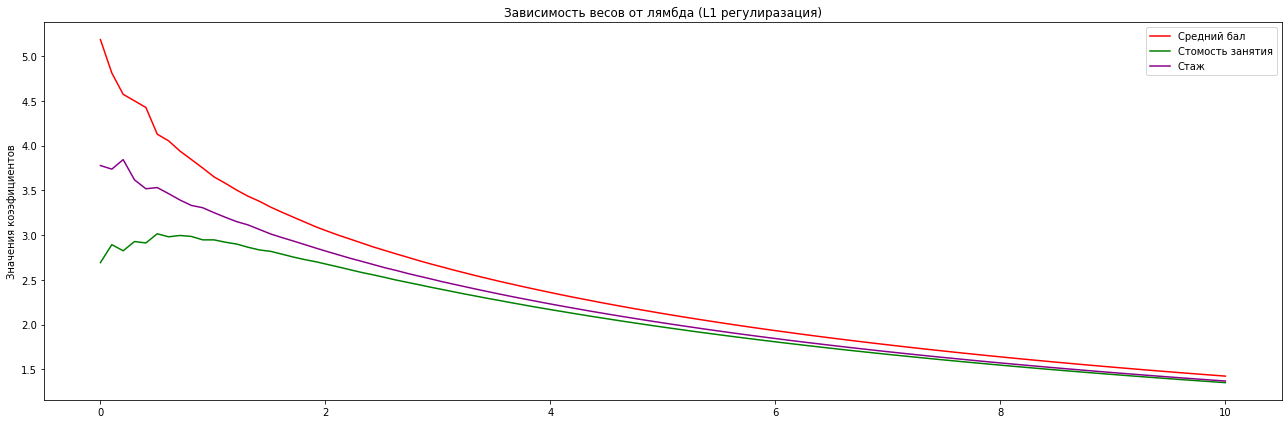

In [107]:
rng = np.linspace(1e-8,10,100)
tmp = []
for t in rng:
    tmp.append(my_model(X_prep,y,t))

W_value = np.array(tmp)

fig, ax = plt.subplots(figsize=(18, 6))

#Уберем наш коээфециент искускуственный...
#ax.plot(rng, W_value[:,0], label='Икуственный коэффциент')
ax.plot(rng, W_value[:,1], label='Средний бал', color='red')
ax.plot(rng, W_value[:,2], label='Стомость занятия', color='green')
ax.plot(rng, W_value[:,3], label='Стаж',color = 'darkmagenta')

ax.set_title('Зависимость весов от лямбда (L1 регулиразация)')
ax.legend(loc='upper right')
ax.set_ylabel('Значения коээфициентов')
fig.tight_layout()
plt.show()